In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import *
from sklearn import preprocessing
from sklearn import metrics

In [3]:
df = pd.read_csv('telecom_churn.csv')

In [4]:
df.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [5]:
df.shape

(3333, 11)

In [ ]:
features = ['AccountWeeks', 'ContractRenewal', 'DataPlan', 'DataUsage', 'CustServCalls',
            'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee', 'RoamMins']
target = 'Churn'

In [6]:
cols = list(df.columns)

In [7]:
for x in cols:
    print(f'{x} = {len(set(df[x]))}')

Churn = 2
AccountWeeks = 212
ContractRenewal = 2
DataPlan = 2
DataUsage = 174
CustServCalls = 10
DayMins = 1667
DayCalls = 119
MonthlyCharge = 627
OverageFee = 1024
RoamMins = 162


In [8]:
#Categorical - Churn, ContractRenewal, DataPlan

#Churn - target variable, 0 if the customer doesn't cancel their subscription, 1 otherwise
#ContractRenewal - 1 if customer recently renewed contract, 0 if not
#DataPlan - 1 if customer has data plan, 0 if not

#Numerical - AccountWeeks, DataUsage, CustServCalls, DayMins, DayCalls, MonthlyCharge, OverageFee, RoamMins

#AccountWeeks - number of weeks customer has had active account
#DataUsage - Data usage in GBs
#CustServCalls - number of calls into customer service
#DayMins - Average Daytime minutes per month
#DayCalls - Average number of Daytime calls
#MonthlyCharge - Average monthly bill
#Overage - Largest Overage Fee in last 12 months
#Roammins - Average number of roaming minutes

<Figure size 1500x1000 with 0 Axes>

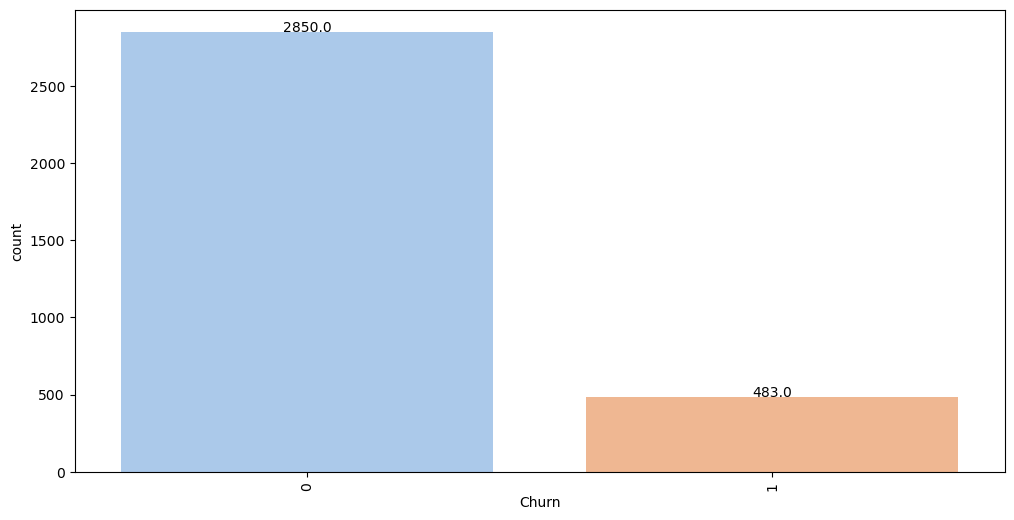

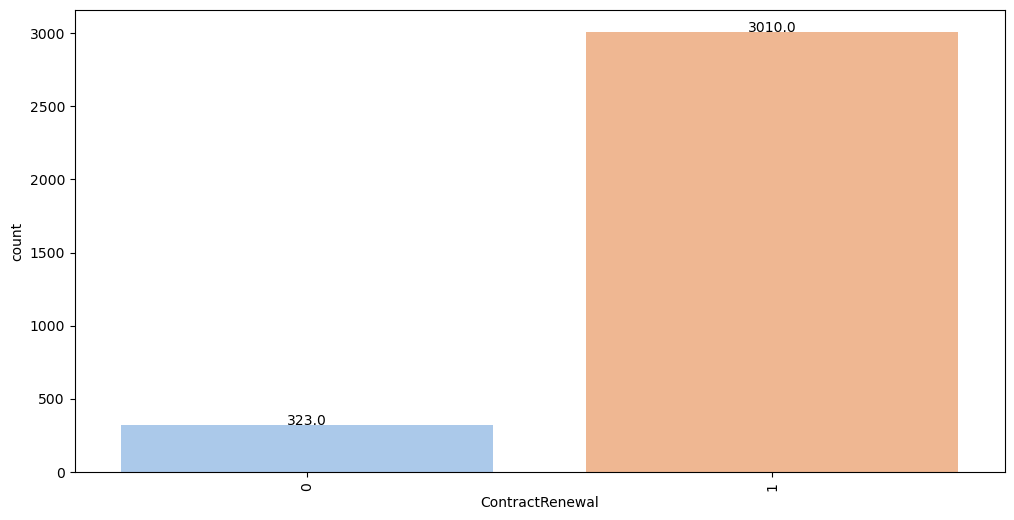

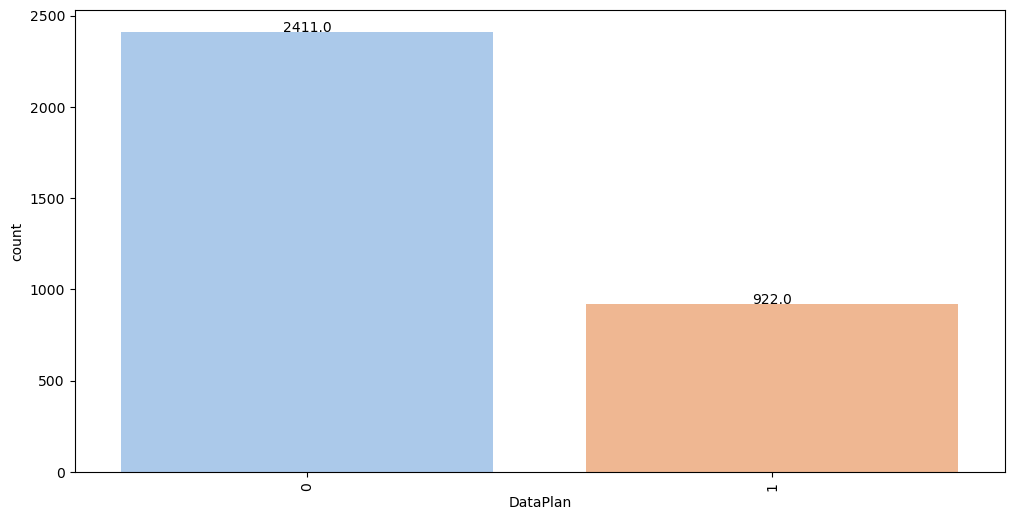

In [9]:
categorical = ['Churn','ContractRenewal','DataPlan']

graphlist = []
plt.figure(figsize = (15,10))
for i in range(len(categorical)):
  fig, ax1 = plt.subplots(figsize=(12,6))
  graph = sns.countplot(ax=ax1,x = categorical[i] , data = df,palette='pastel')
  graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
  graphlist.append(graph)
  for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

#unbalanced dataset, way more people retaining their subscription than not. 
#Too many people have renewed their contract recently.
#Also nearly 3/4th of them have a data plan

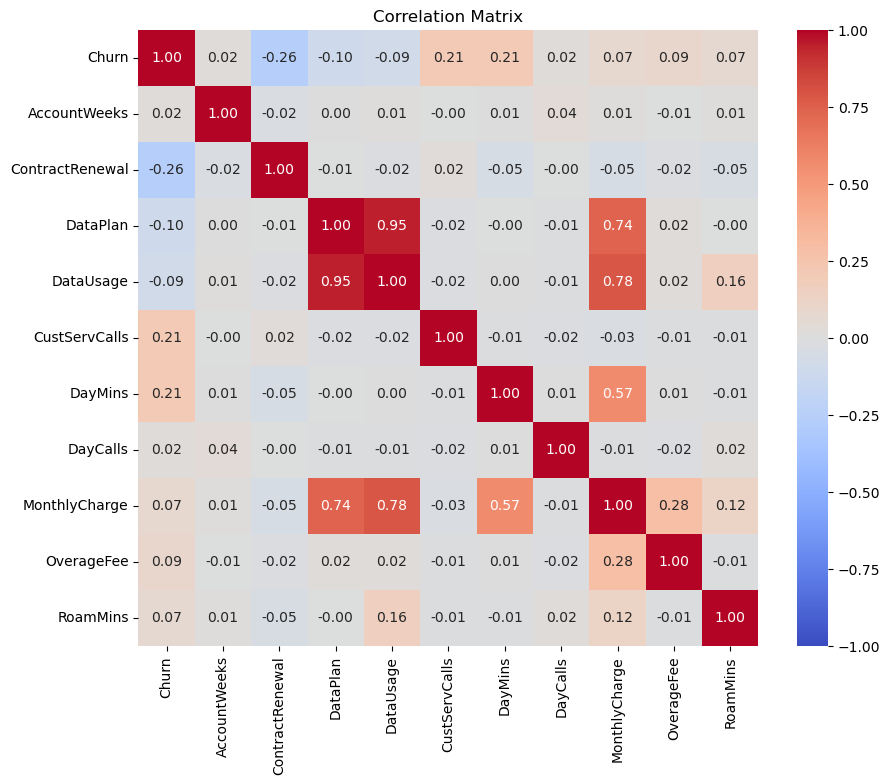

In [10]:
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

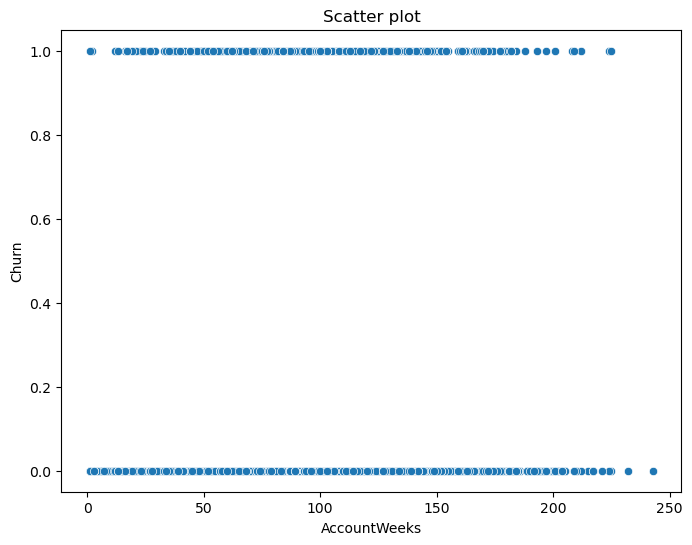

In [11]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['AccountWeeks'], y=df['Churn'])
plt.xlabel('AccountWeeks')
plt.ylabel('Churn')
plt.title('Scatter plot')
plt.show()

# Correlation coefficient
#correlation = data['Regressor'].corr(data['Target'])
#print(f'Correlation coefficient: {correlation}')

In [12]:
def histp(df,col):
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col])
    plt.show()

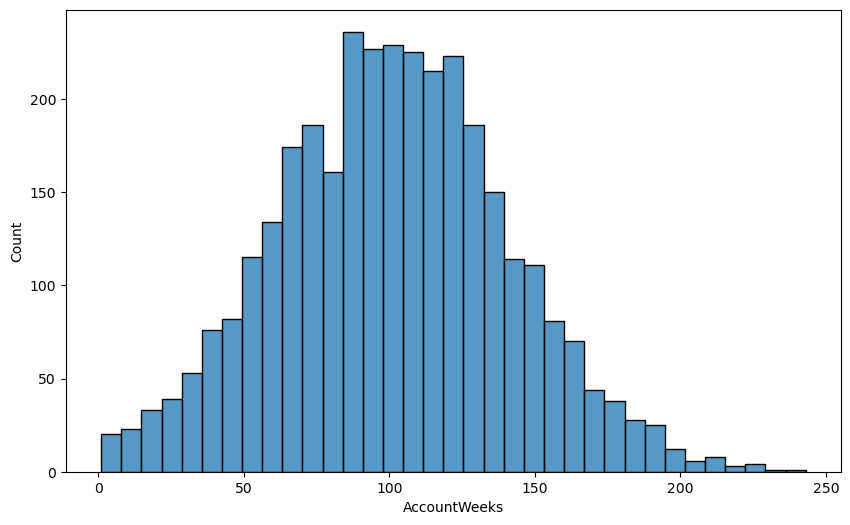

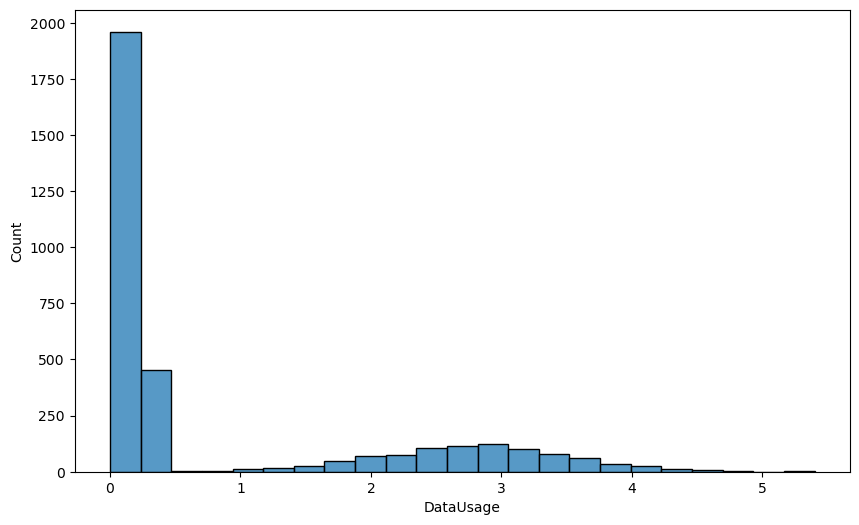

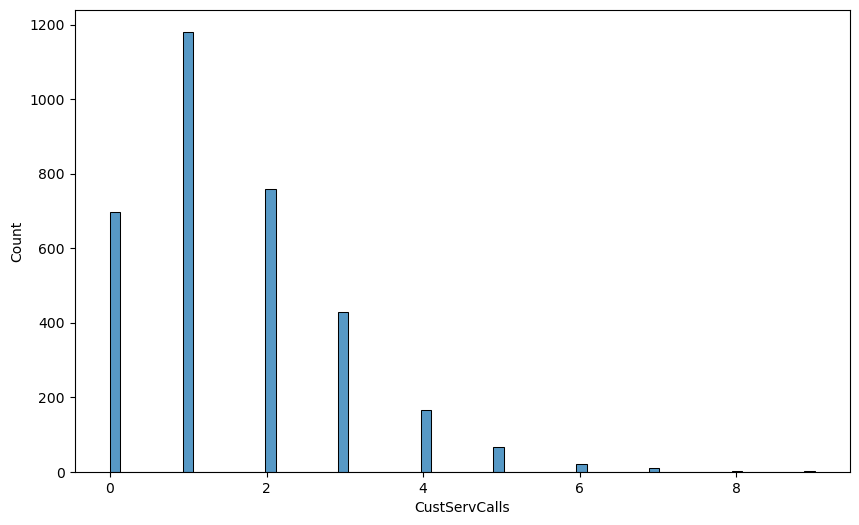

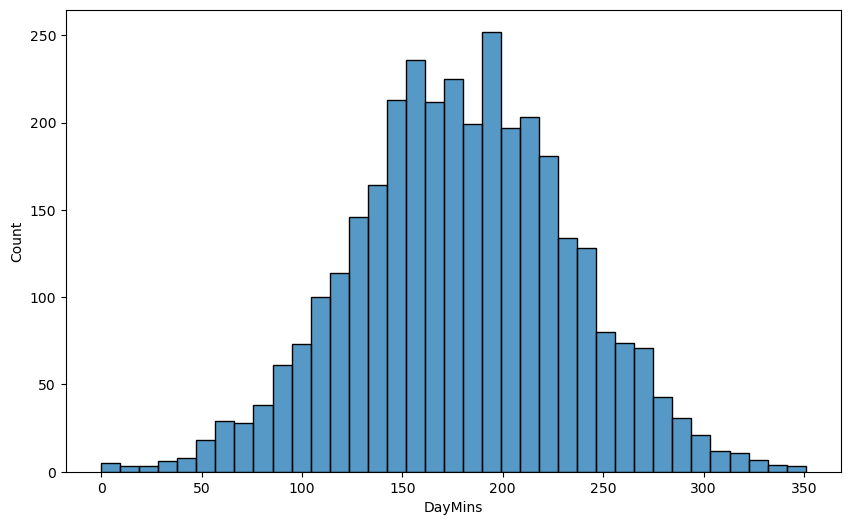

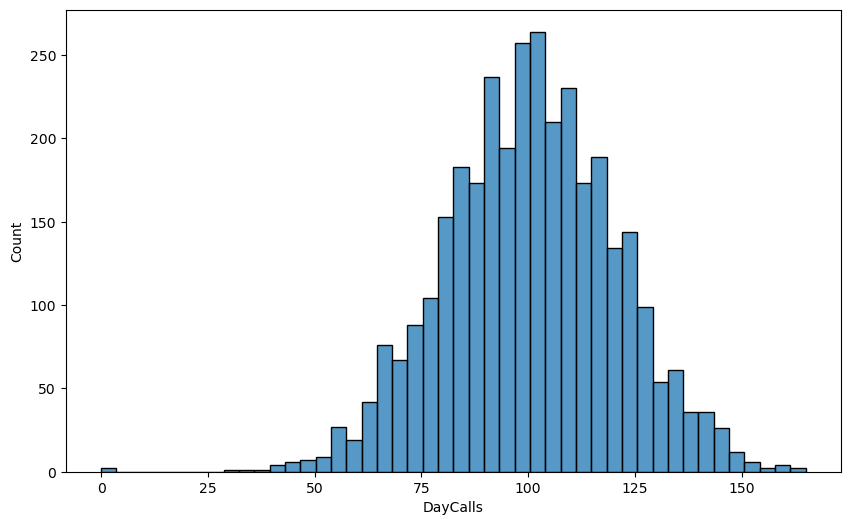

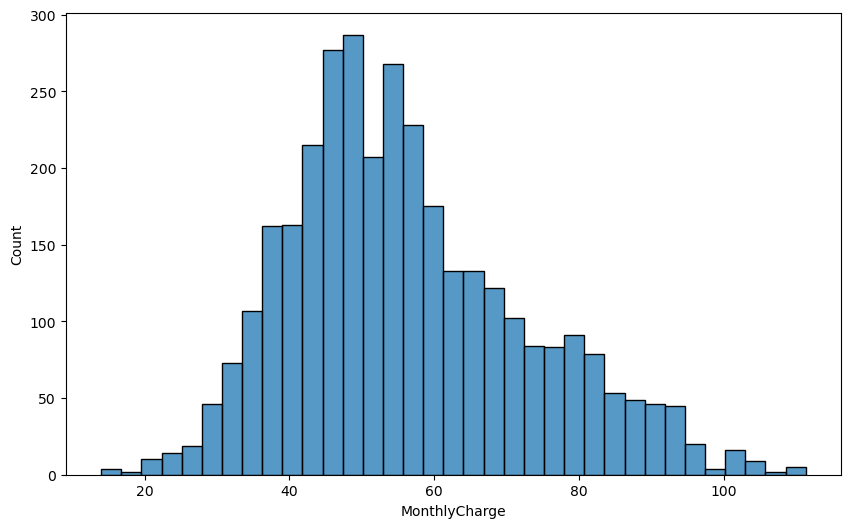

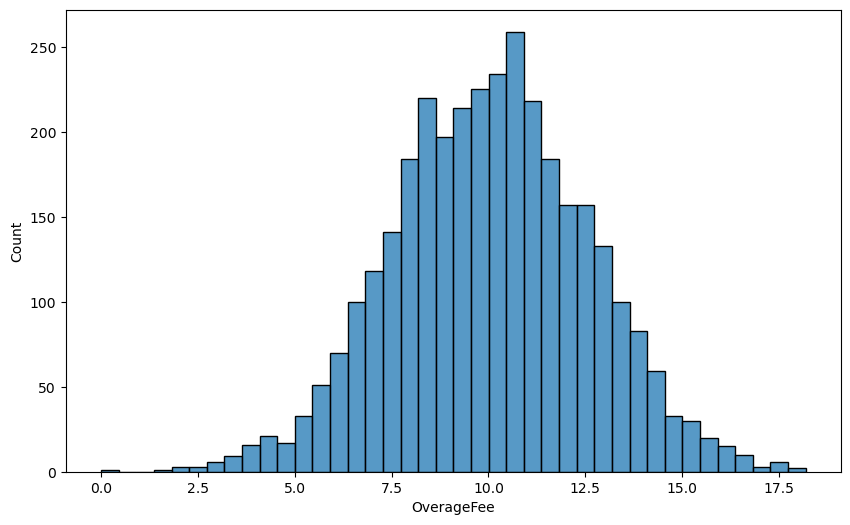

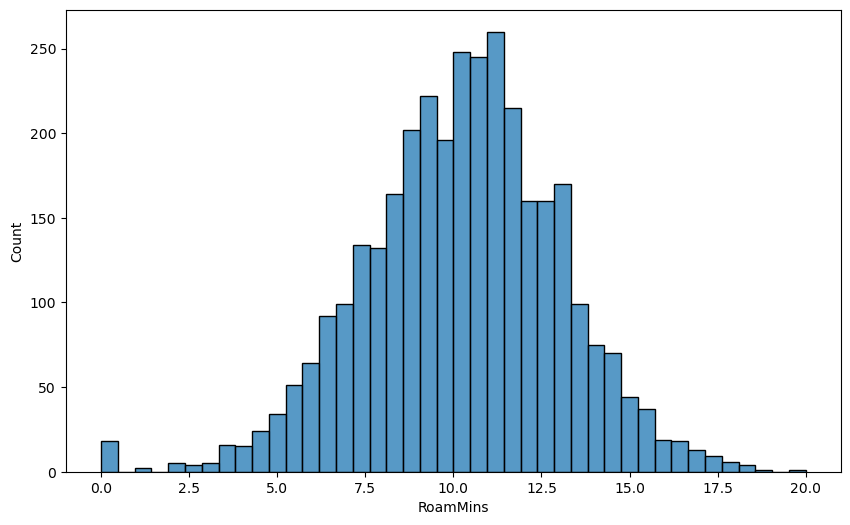

In [13]:
numerical = ['AccountWeeks', 'DataUsage', 'CustServCalls', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee', 'RoamMins']

for col in numerical:
    histp(df,col)

In [33]:
df.iloc[[0]]

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0


In [120]:
df.columns

Index(['Churn', 'AccountWeeks', 'ContractRenewal', 'DataPlan', 'DataUsage',
       'CustServCalls', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee',
       'RoamMins'],
      dtype='object')

In [147]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [148]:
X

,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,128,1,1,2.70,1,265.1,110,89.0,9.87,10.0
1,107,1,1,3.70,1,161.6,123,82.0,9.78,13.7
2,137,1,0,0.00,0,243.4,114,52.0,6.06,12.2
3,84,0,0,0.00,2,299.4,71,57.0,3.10,6.6
4,75,0,0,0.00,3,166.7,113,41.0,7.42,10.1
...,...,...,...,...,...,...,...,...,...,...
3328,192,1,1,2.67,2,156.2,77,71.7,10.78,9.9
3329,68,1,0,0.34,3,231.1,57,56.4,7.67,9.6
3330,28,1,0,0.00,2,180.8,109,56.0,14.44,14.1
3331,184,0,0,0.00,2,213.8,105,50.0,7.98,5.0


In [149]:
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,shuffle=True)

In [150]:
X_train.shape

(2666, 10)

In [151]:
y_train.shape

(2666,)

In [152]:
X_test.shape

(667, 10)

In [153]:
y_test.shape

(667,)

In [154]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)

In [155]:
reg.score(X_test, y_test)

0.1692010443414379

In [156]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)

In [157]:
cross_val_score(clf, X_train, y_train, cv=10)

array([0.87640449, 0.88014981, 0.87265918, 0.88389513, 0.87640449,
       0.88014981, 0.89473684, 0.89473684, 0.91353383, 0.90225564])

In [158]:
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.889055472263868

In [159]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

param_grid = {
    'max_depth': [3, 5, 7, 10, 12 ,15],
    'min_samples_split': [2, 5,7, 10],
    'min_samples_leaf': [1, 2, 3,4],
    'max_features': [None, 'sqrt', 'log2']
}

clf = DecisionTreeClassifier(random_state=0)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train_scaled, y_train)

# Print the best parameters and the best score
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best Cross-Validation Score: {grid_search.best_score_}')

# Train the model with the best parameters
best_clf = grid_search.best_estimator_
best_clf.fit(X_train_scaled, y_train)

# Evaluate the model on the test set
y_pred = best_clf.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_pred)
print(f'Test Set Accuracy: {test_accuracy}')

Best Parameters: {'max_depth': 5, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 5}
Best Cross-Validation Score: 0.9298564411746106
Test Set Accuracy: 0.9130434782608695


In [166]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
param_grid = {
    'n_neighbors': [3, 5, 7, 10],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train_scaled, y_train)

# Print the best parameters and the best score
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best Cross-Validation Score: {grid_search.best_score_}')

# Train the model with the best parameters
best_knn = grid_search.best_estimator_
best_knn.fit(X_train_scaled, y_train)

# Evaluate the model on the test set
y_pred = best_knn.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_pred)
print(f'Test Set Accuracy: {test_accuracy}')

Best Parameters: {'algorithm': 'auto', 'n_neighbors': 10, 'weights': 'distance'}
Best Cross-Validation Score: 0.8942281341568818
Test Set Accuracy: 0.9010494752623688


In [162]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to select 7 components
pca = PCA(n_components=7)
X_pca = pca.fit_transform(X_scaled)

# Examine the contribution of each feature to the principal components
pca_components = pd.DataFrame(pca.components_, columns=features, index=[f'PC{i+1}' for i in range(pca.n_components)])
print("PCA Components:\n", pca_components)

# Sum the absolute values of loadings for each feature
feature_importance = pca_components.abs().sum(axis=0)

# Sort the features by importance
sorted_features = feature_importance.sort_values(ascending=False)
print("Feature importance:\n", sorted_features)

# Select the top 7 features
top_features = sorted_features.head(7).index.tolist()
print("Top 7 features:\n", top_features)

PCA Components:
      AccountWeeks  ContractRenewal  DataPlan  DataUsage  CustServCalls  \
PC1      0.010784        -0.032880  0.548444   0.563783      -0.024918   
PC2      0.026158        -0.210628 -0.307536  -0.301511      -0.065857   
PC3      0.446911        -0.427542 -0.057662   0.031869      -0.261557   
PC4     -0.367198        -0.456723 -0.055437   0.010964      -0.295085   
PC5     -0.131136        -0.173904 -0.065570   0.005715       0.740921   
PC6      0.638600        -0.146282  0.007681  -0.002025       0.423890   
PC7      0.320073        -0.385183  0.094316   0.026513      -0.215009   

      DayMins  DayCalls  MonthlyCharge  OverageFee  RoamMins  
PC1  0.187237 -0.007554       0.570192    0.106029  0.089802  
PC2  0.754644  0.013090       0.279729    0.334876 -0.071261  
PC3 -0.004786  0.492682      -0.043344   -0.247827  0.488538  
PC4 -0.259633 -0.448659      -0.041904    0.365656  0.402662  
PC5  0.195129 -0.236971       0.018059   -0.366139  0.413098  
PC6 -0.26721